<div align='center'><font size="5" color='#353B47'>Tweet Sentiment Extraction</font></div>
<div align='center'><font size="4" color="#353B47">Data Cleaning and Wordclouds</font></div>
<br>
<hr>

## <div id="summary">Table of contents</div>

**<font size="2"><a href="#chap1">1. Basic manipulations</a></font>**
**<br><font size="2"><a href="#chap2">2. Distribution of tweets length</a></font>**
**<br><font size="2"><a href="#chap3">3. Shorter tweets</a></font>**
**<br><font size="2"><a href="#chap4">4. Distribution of word counts</a></font>**
**<br><font size="2"><a href="#chap5">5. Cleaning tweets</a></font>**
**<br><font size="2"><a href="#chap6">6. Wordcloud</a></font>**

# <div id="chap1">1. Basic manipulations</div>

In [1]:
# Libraries
import re
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Import data
train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')

# Adding interesting variables for analysis
train['length'] = train['text'].apply(lambda x:len(str(x)))
train['word_counts'] = train['text'].apply(lambda x:len(str(x).split()))

In [3]:
# Print first rows of train
train.head()
print(f'{train.shape[0]} observations, {train.shape[1]} columns')

27481 observations, 6 columns


In [4]:
# Count samples per category
print(train['sentiment'].value_counts(), "\n")
print(train['sentiment'].value_counts(normalize=True))

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64 

neutral     0.404570
positive    0.312288
negative    0.283141
Name: sentiment, dtype: float64


In [5]:
x = ['Neutral', 'Positive', 'Negative']
y = [11118, 8582, 7781]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['40% of tweets', '31% of tweets', '29% of tweets'])])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()

### Example of sentiment

In [6]:
neutral = train[train['sentiment'] == 'neutral']
positive = train[train['sentiment'] == 'positive']
negative = train[train['sentiment'] == 'negative']

In [7]:
#neutral_text
print("Neutral tweet example  :",neutral['text'].values[1])
# Positive tweet
print("Positive Tweet example :",positive['text'].values[1])
#negative_text
print("Negative Tweet example :",negative['text'].values[1])

Neutral tweet example  : http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth
Positive Tweet example :  Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
Negative Tweet example : my boss is bullying me...


# <div id="chap2">2. Distribution of tweets length</div>

In [8]:
x = train.length.values

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()

In [9]:
x1 = neutral.length.values
x2 = positive.length.values
x3 = negative.length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5, 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()

In [10]:
y1 = neutral.length.values
y2 = positive.length.values
y3 = negative.length.values

fig = go.Figure()

fig.add_trace(go.Box(y=y1, 
                     name="Neutral", 
                     marker_line_width=1, 
                     marker_line_color="midnightblue"))

fig.add_trace(go.Box(y=y2, 
                     name="Positive", 
                     marker_line_width=1, 
                     marker_color = 'rgb(50,202,50)'))

fig.add_trace(go.Box(y=y3, 
                     name="Negative", 
                     marker_line_width=1, 
                     marker_color = 'crimson'))

fig.update_layout(title_text="Box Plot tweet lengths")

fig.show()

It can also be seen on these boxplots that the minimum tweets length value is close to zero. Let's take a closer look at these tweets.

# <div id="chap3">3. Shorter tweets</div>

In [11]:
indexes = [index for index, tweet in enumerate(train['text']) if len(str(tweet)) <= 5 ]
train.iloc[indexes,:]

,textID,text,selected_text,sentiment,length,word_counts
238,e98226e842,Thx,Thx,neutral,4,1
314,fdb77c3752,NaN,NaN,neutral,3,1
641,5210cc55ae,no,no,neutral,3,1
735,a1bda541fd,yep,yep,neutral,4,1
1308,823122597e,mean,mean,neutral,5,1
1668,a2f9a26b7d,aww,aww,neutral,4,1
3447,06a28a5f3e,Why?,Why?,neutral,5,1
3675,f18b9435c8,with,with,neutral,5,1
5790,8560ce3f2e,Hey,Hey,neutral,4,1
6596,1cfb46972e,good,good,positive,5,1


There are words under 5 letters that can describe a positive or negative sentiment: good, lame... Most of these short tweets are neutral though.

In [12]:
indexes = [index for index, tweet in enumerate(train['text']) if len(str(tweet)) == 3 ]
train.iloc[indexes,:]

,textID,text,selected_text,sentiment,length,word_counts
314,fdb77c3752,NaN,NaN,neutral,3,1
641,5210cc55ae,no,no,neutral,3,1
11524,4105b6a05d,aw,aw,neutral,3,1
14339,5c6abc28a1,ow,ow,neutral,3,1
25699,ee8ee67cb3,ME,ME,neutral,3,1
26005,0b3fe0ca78,?,?,neutral,3,1


All the mallest tweets are neutral.

# <div id="chap4">4. Distribution of word counts</div>

In [13]:
x = train.word_counts.values

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue")])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()

In [14]:
x1 = neutral.word_counts.values
x2 = positive.word_counts.values
x3 = negative.word_counts.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()

In [15]:
y1 = neutral.word_counts.values
y2 = positive.word_counts.values
y3 = negative.word_counts.values

fig = go.Figure()

fig.add_trace(go.Box(y=y1, 
                     name="Neutral", 
                     marker_line_width=1, 
                     marker_line_color="midnightblue"))

fig.add_trace(go.Box(y=y2, 
                     name="Positive", 
                     marker_line_width=1, 
                     marker_color = 'rgb(50,202,50)'))

fig.add_trace(go.Box(y=y3, 
                     name="Negative", 
                     marker_line_width=1, 
                     marker_color = 'crimson'))

fig.update_layout(title_text="Box Plot word counts")

fig.show()

# <div id="chap5">5. Cleaning tweets</div>

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 6 columns):
textID           27481 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27481 non-null object
length           27481 non-null int64
word_counts      27481 non-null int64
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [17]:
sentences = train['selected_text'].values
print(list(sentences).index(np.nan))

314


In [18]:
print(sentences[13133])
train = train.drop(13133, axis=0)

140 pages and i`m done with eclipse!


In [19]:
# Find emoji patterns
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [20]:
# Basic function to clean the text
def clean_text(text):
    text = str(text)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove identifications
    text = re.sub(r'@\w+', '', text)
    # Remove links
    text = re.sub(r'http.?://[^/s]+[/s]?', '', text)
    return text.strip().lower()

train['text'] = train['text'].apply(lambda x:clean_text(x))

# <div id="chap6">6. Wordcloud</div>

There are 1871079 words in the combination of all review.


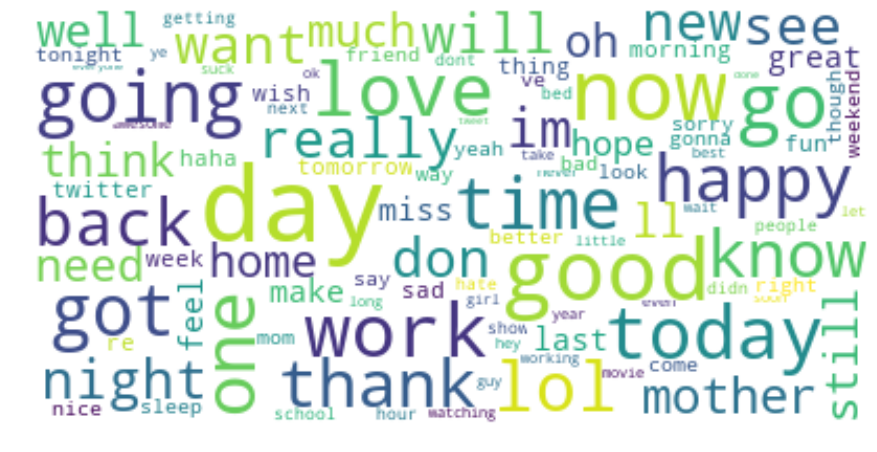

In [21]:
def wordcloud(df, text = 'text'):
    
    # Join all tweets in one string
    corpus = " ".join(str(review) for review in df[text])
    print (f"There are {len(corpus)} words in the combination of all review.")
    
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100,
                          collocations = False,
                          background_color="white").generate(corpus)
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

wordcloud(df = train)

Neutral Wordcloud
There are 736024 words in the combination of all review.


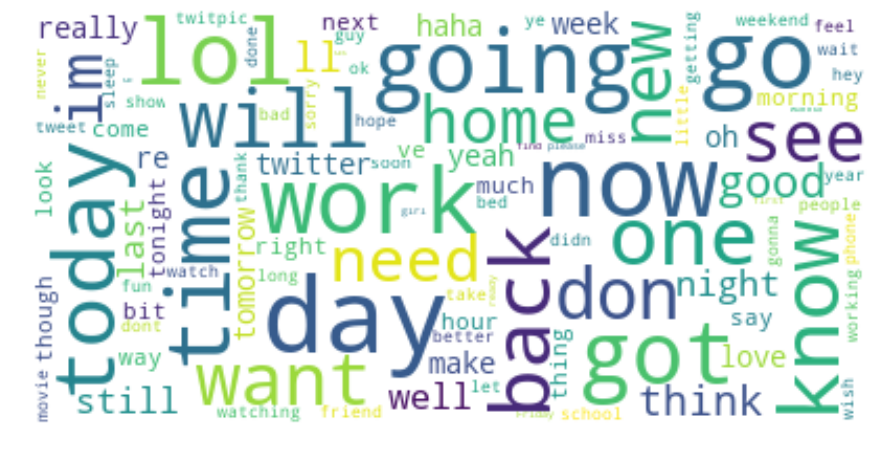

Positive Wordcloud
There are 612918 words in the combination of all review.


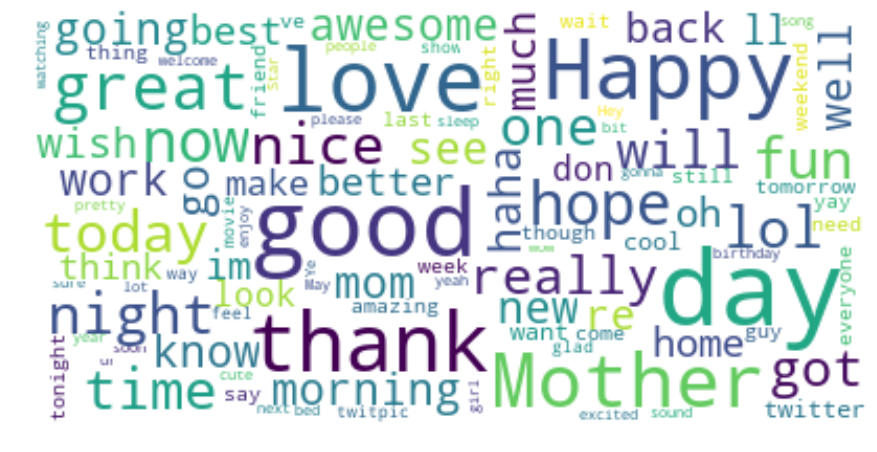

Negative Wordcloud
There are 556248 words in the combination of all review.


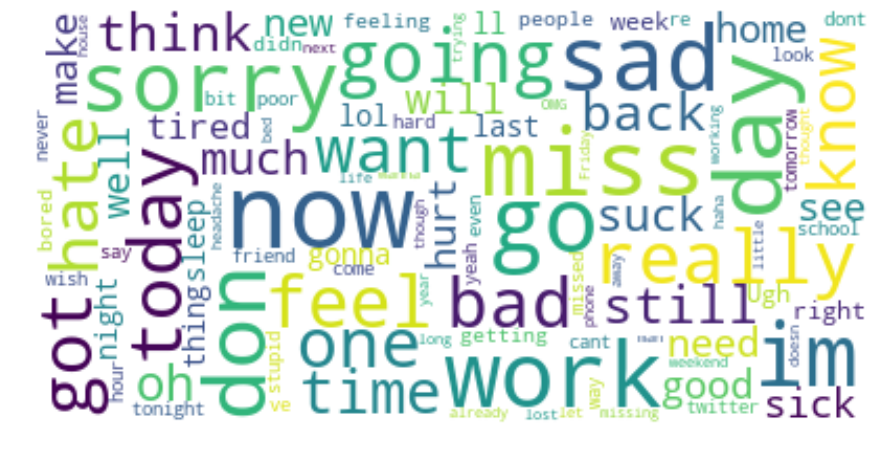

In [22]:
print('Neutral Wordcloud')
wordcloud(df = neutral)

print('Positive Wordcloud')
wordcloud(df = positive)

print('Negative Wordcloud')
wordcloud(df = negative)

<hr>
<br>
<div align='justify'><font color="#353B47" size="4">Thank you for taking the time to read this notebook. I hope that I was able to answer your questions or your curiosity and that it was quite understandable. <u>any constructive comments are welcome</u>. They help me progress and motivate me to share better quality content. I am above all a passionate person who tries to advance my knowledge but also that of others. If you liked it, feel free to <u>upvote and share my work.</u> </font></div>
<br>
<div align='center'><font color="#353B47" size="3">Thank you and may passion guide you.</font></div>